
Add dependencies scikit-learn, pandas, matplotlib

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap, BoundaryNorm

Load in dataset

In [22]:
mb_raw_data = pd.read_csv('C:\\Users\\Simon\\PycharmProjects\\ion-mobility-prediction\\data\\mann_bruker_simplified.csv')
mb_data_frame = pd.DataFrame(mb_raw_data)
tw_raw_data = pd.read_csv('C:\\Users\\Simon\\PycharmProjects\\ion-mobility-prediction\\data\\tenzer_waters.csv')
tw_data_frame = pd.DataFrame(tw_raw_data)

Scatterplots for:
* Ion mobility index vs CCS but the data points should be seperated by charge. Charges are discrete values so the data points should be colored by disce
* Ion mobility Index vs Charge
* Ion mobility length vs CCS length

<AxesSubplot: xlabel='Ion mobility length', ylabel='CCS length'>

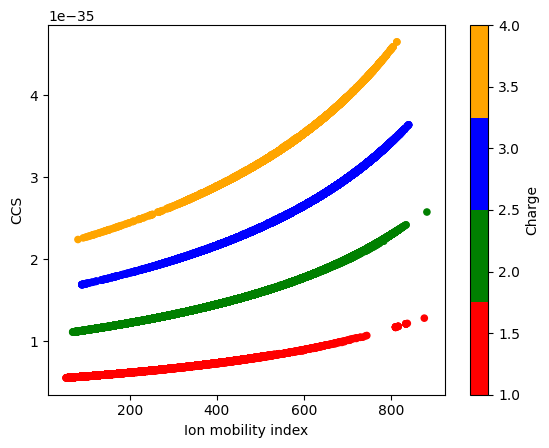

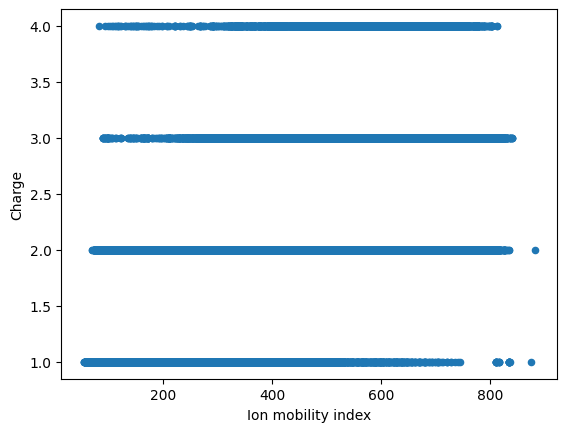

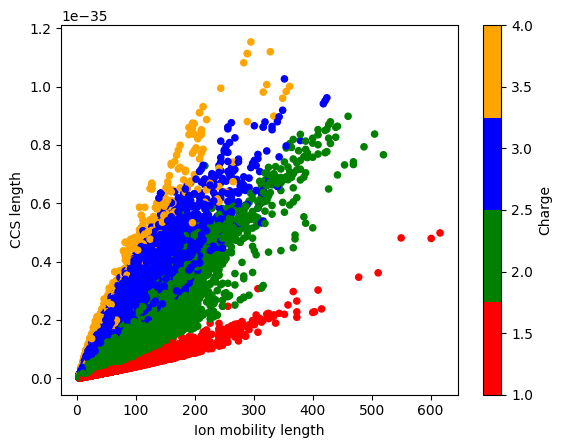

In [23]:
colors = ['red', 'green', 'blue', 'orange']
cmap = ListedColormap(colors)
mb_data_frame.plot.scatter(x='Ion mobility index', y='CCS', c='Charge', colormap=cmap)
mb_data_frame.plot.scatter(x='Ion mobility index', y='Charge')
mb_data_frame.plot.scatter(x='Ion mobility length', y='CCS length', c='Charge', colormap=cmap)

Create two graphs: Sequence length vs how many times it occurs in the dataset.

Text(0.5, 1.0, 'Tenzer Waters')

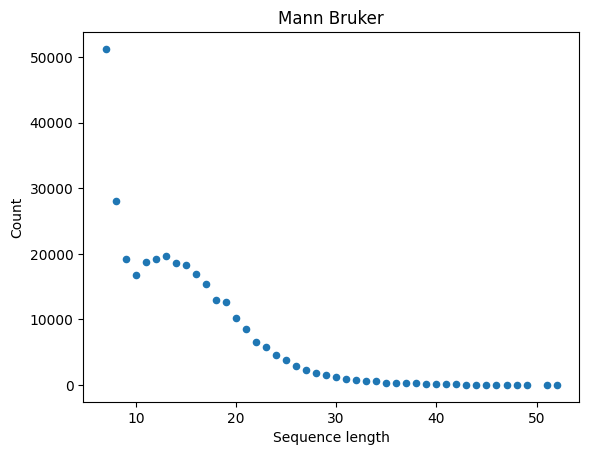

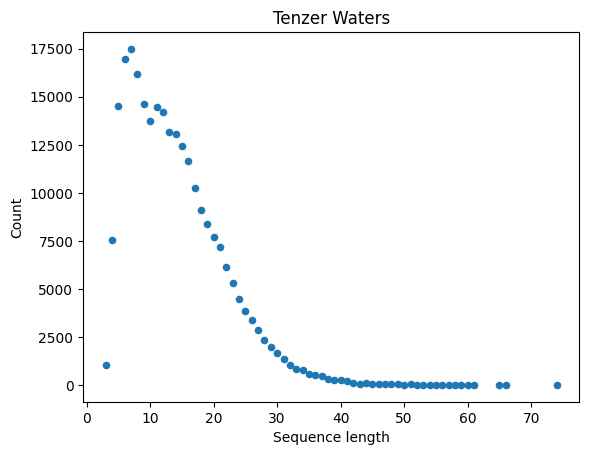

In [24]:
mb_data_frame['Sequence length'] = mb_data_frame['Sequence'].str.len()
tw_data_frame['Sequence length'] = tw_data_frame['sequence'].str.len()
# Create a new DataFrame with the counts of each sequence length
mb_sequence_length_counts = mb_data_frame['Sequence length'].value_counts()
tw_sequence_length_counts = tw_data_frame['Sequence length'].value_counts()
mb_sequence_length_counts_df = pd.DataFrame(mb_sequence_length_counts)
tw_sequence_length_counts_df = pd.DataFrame(tw_sequence_length_counts)
# Reset the index of the DataFrame
mb_sequence_length_counts_df = mb_sequence_length_counts_df.reset_index()
tw_sequence_length_counts_df = tw_sequence_length_counts_df.reset_index()
# Rename the columns
mb_sequence_length_counts_df.columns = ['Sequence length', 'Count']
tw_sequence_length_counts_df.columns = ['Sequence length', 'Count']
# Plot the DataFrame and add a title
mb_sequence_length_counts_df.plot.scatter(x='Sequence length', y='Count')
plt.title('Mann Bruker')
tw_sequence_length_counts_df.plot.scatter(x='Sequence length', y='Count')
plt.title('Tenzer Waters')

Perform PCA on ion mobility index, ion mobility length, CCS and CCS length to see if there is any correlation between them

In [25]:
numeric_columns = ['Ion mobility index', 'Ion mobility length', 'CCS', 'CCS length']
numeric_data = mb_raw_data[numeric_columns]
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Transform the data to the principal components
components = pca.transform(scaled_data)
# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components as a new DataFrame
components_df = pd.DataFrame(
    data=components,
    columns=[f'PC{i+1}' for i in range(len(numeric_columns))]
)

# Print the explained variance ratio and the principal components
print('Explained Variance Ratio:', explained_variance_ratio)
print('Principal Components:\n', components_df)


Explained Variance Ratio: [0.57059449 0.36669248 0.04323845 0.01947458]
Principal Components:
              PC1       PC2       PC3       PC4
0       0.892319  0.593887 -1.405076  0.293569
1      -2.266415  0.299383 -0.267773 -0.278601
2      -2.296366  0.318431 -0.298742 -0.279322
3      -2.301493  0.208769 -0.290121 -0.325745
4      -2.286390  0.312081 -0.288413 -0.279081
...          ...       ...       ...       ...
321602 -0.326878 -1.600293  0.279701 -0.058138
321603  1.346969 -1.050817 -0.364191  0.159613
321604  1.655052 -0.631415 -0.365954  0.048063
321605 -0.161820  0.041561  0.129670  0.032776
321606 -0.409130 -0.398728  0.076571 -0.022359

[321607 rows x 4 columns]
